<a href="https://colab.research.google.com/github/anjaleeDS/MLCS68/blob/master/01hwTelco_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
telco_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Telco-Customer-Churn.csv')

In [3]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
telco_data.Churn.value_counts()

No     3738
Yes    1332
Name: Churn, dtype: int64

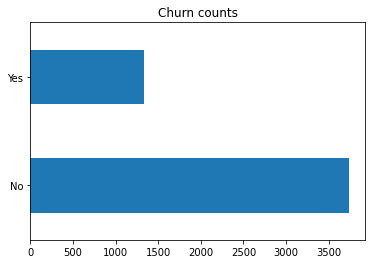

In [5]:
telco_data.Churn.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

In [6]:
telco_data.Churn = telco_data.Churn.replace({'Yes':1, 'No':0}) # Replacing 'Yes' and 'No' with numerical values

In [7]:
y = telco_data.pop('Churn') # Removing Churn field and storing it in variable y
X = telco_data[['SeniorCitizen', 'tenure']] # Creating a smaller subset of features

In [ ]:
telco_data.PaymentMethod.value_counts()

# Splitting data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
X_train.head()

,SeniorCitizen,tenure
2099,0,40
3186,0,58
4066,0,56
856,0,72
1708,0,4


# Fitting model

In [11]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X_test)[:, 1]

# Evaluating model

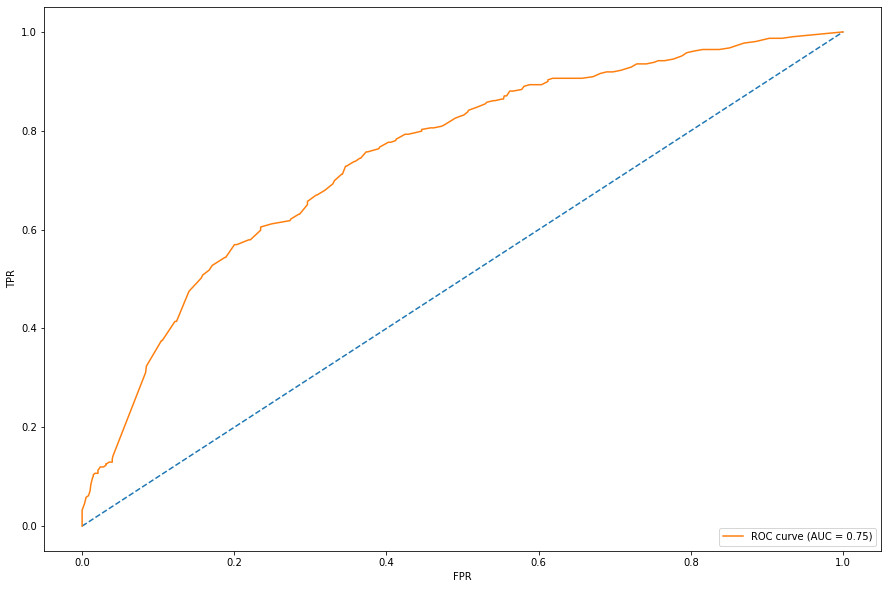

In [12]:
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

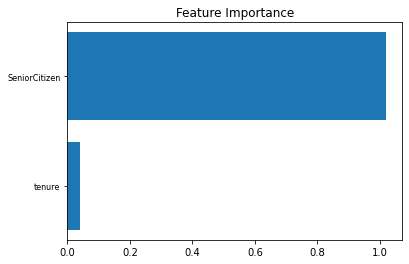

In [13]:
feature_importance = abs(clf.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()

#My tests

## PaymentMethod, Multiple Lines, InternetService, Contract

###subset the data

In [86]:
X2 = telco_data[['PaymentMethod', 'MultipleLines', 'InternetService', 'Contract']] # Creating a smaller subset of features
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PaymentMethod    5070 non-null   object
 1   MultipleLines    5070 non-null   object
 2   InternetService  5070 non-null   object
 3   Contract         5070 non-null   object
dtypes: object(4)
memory usage: 158.6+ KB


###change the categorical columns and values into dummies

In [85]:
#dummify
dum_X2 = pd.get_dummies(data=X2, drop_first=True) 
dum_X2

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year
0,0,1,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5065,0,0,0,0,1,0,1,1,0
5066,0,0,0,1,0,0,0,0,1
5067,0,0,0,0,0,0,0,0,0
5068,0,0,0,0,0,0,1,0,1


###make new x and y for training and test set

In [87]:
X2_train, X2_test, y_train, y_test = train_test_split(dum_X2, y, test_size = 0.25)

### fit and evaluate model

In [88]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X2_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X2_test)[:, 1]

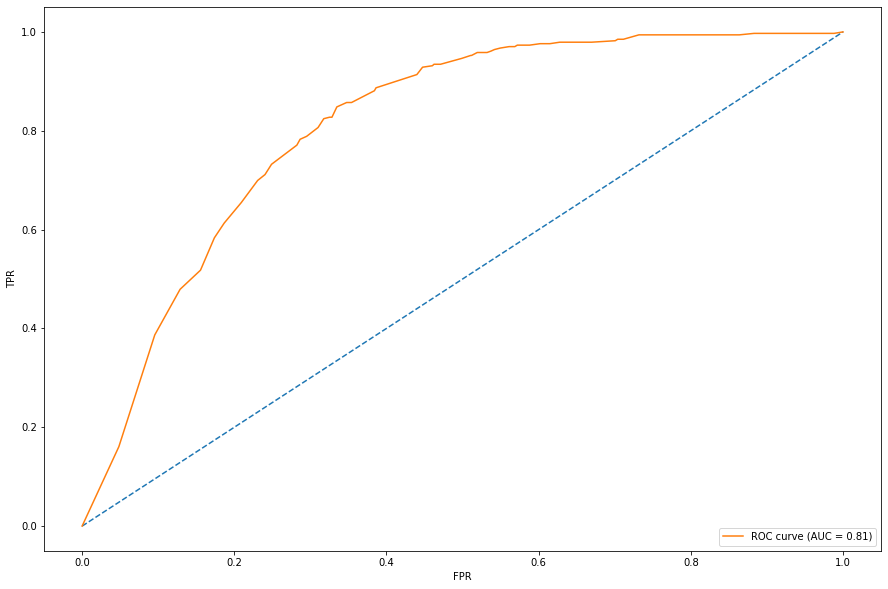

In [89]:
# evaluate

# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

In [109]:
# sorted_idx.shape[0]
X2.columns

Index(['PaymentMethod', 'MultipleLines', 'InternetService', 'Contract'], dtype='object')

###feature importance

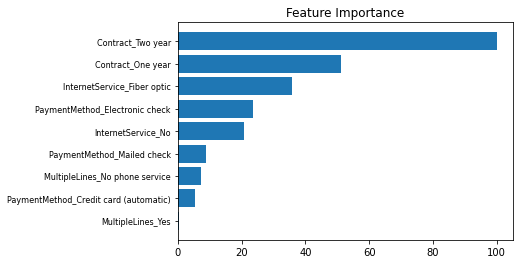

In [110]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
# featax.set_yticklabels(X2.columns[sorted_idx])
featax.set_yticklabels(np.array(X2_test.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()

### PaymentMethod, Multiple Lines, InternetService, Contract

In [27]:
# copy telco_data for safety
master_telco_data = telco_data

# drop customerID
telco_data.drop(columns='customerID', inplace=True)

# make TotalCharges into float64
telco_data.TotalCharges = telco_data.TotalCharges.convert_dtypes() #make into string
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce') #make into float

#0. get numerical columns
numerical_cols = telco_data.columns[telco_data.dtypes=='int64'].tolist()


#1. get all columns that are non-numeric
categorical_cols = telco_data.columns[telco_data.dtypes=='object'].tolist()

#2. get all columns that are binary and change WITHIN the original dataframe and
# them using LabelEncoder (incremental coding) because order does not matter
binary_columns = telco_data[categorical_cols].nunique()[telco_data[categorical_cols].nunique() == 2].index.tolist()

  # Transform binary_columns
for column in binary_columns:
  telco_data[column] = LabelEncoder().fit_transform(telco_data[column])

#3. get all columns that are non-binary and change them using pd.get_dummies 
multi_valued_cols = telco_data[categorical_cols].nunique()[telco_data[categorical_cols].nunique() > 2].index.tolist()
dummies_adjusted_data = pd.get_dummies(data=telco_data, columns=multi_valued_cols, drop_first=True )

#4. combine the dummy data and now, encoded binary columns together


In [ ]:
# Scaling Numerical columns

my_std = StandardScaler()
scaled = my_std.fit_transform(dummies_adjusted_data[numerical_cols])
scaled = pd.DataFrame(scaled, columns=numerical_cols)
scaled

In [ ]:
#integrate scaled into dummies prepped matrix and take out the old ones
dummies_adjusted_data = dummies_adjusted_data.copy()

data = dummies_adjusted_data.drop(columns = numerical_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")
data

In [58]:
telco_data['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
5065    1
5066    0
5067    0
5068    0
5069    0
Name: SeniorCitizen, Length: 5070, dtype: int64

In [54]:
#make new df
x1 = data
x1 = x1.fillna(0)

#make into a def!!!
# x1.isnull().any() #BOOLEAN tells which column has the null/nan
# x1.TotalCharges = x1.TotalCharges.fillna(0)
# x1.isnull().sum() #COUNT tells which column has the null/nan

#split data
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25)
x1_train.head()


,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling
3478,78.55,1843.05,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,-1.011107,-0.436372,-0.962821,-0.646977,-0.374957,0.320021,0.833038
4101,59.15,336.70,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.989015,-0.436372,-0.962821,-0.646977,-1.065546,0.320021,0.833038
899,94.40,4914.90,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0.989015,-0.436372,1.038615,-0.646977,0.721862,0.320021,0.833038
318,93.15,2231.05,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0.989015,2.291624,1.038615,-0.646977,-0.334334,0.320021,0.833038
2210,104.00,7028.50,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,-1.011107,-0.436372,-0.962821,-0.646977,1.493697,0.320021,-1.200425


MonthlyCharges                           False
TotalCharges                             False
MultipleLines_No phone service           False
MultipleLines_Yes                        False
InternetService_Fiber optic              False
InternetService_No                       False
OnlineSecurity_No internet service       False
OnlineSecurity_Yes                       False
OnlineBackup_No internet service         False
OnlineBackup_Yes                         False
DeviceProtection_No internet service     False
DeviceProtection_Yes                     False
TechSupport_No internet service          False
TechSupport_Yes                          False
StreamingTV_No internet service          False
StreamingTV_Yes                          False
StreamingMovies_No internet service      False
StreamingMovies_Yes                      False
Contract_One year                        False
Contract_Two year                        False
PaymentMethod_Credit card (automatic)    False
PaymentMethod

In [ ]:
x1_train.isnull().any()

In [56]:
#fit model
my_clf = LogisticRegression().fit(x1_train,y_train)
#predict probabilities
my_predictions = my_clf.predict_proba(x1_test)[:,1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
